<a href="https://colab.research.google.com/github/rizaho/ml_for_financial_analysis/blob/main/Stocks_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
import seaborn as sns
%matplotlib inline
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/Python & ML for Financial Analysis/"

Mounted at /content/drive


In [4]:
stocks_df = pd.read_csv(DRIVE_DATASET_PATH + "stock.csv")

In [5]:
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [16]:
# sort the stocks by date
stocks_df = stocks_df.sort_values(by = ['Date'])

print("# of stocks is {}".format(len(stocks_df.columns[1:])))
print("# of stock dates is {}".format(len(stocks_df[:])))

print("Name of the columns:")
for columnName in stocks_df.columns[1:]:
  print(columnName)

stocks_df


# of stocks is 9
# of stock dates is 2159
Name of the columns:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [53]:
# Average return of S&P500
stocks_df_only_stocks = stocks_df[stocks_df.columns[1:]]
avg_series = stocks_df_only_stocks.mean()
avg_df = pd.DataFrame({'name':avg_series.index, 'average':avg_series.values})
avg_df = avg_df.sort_values(by = ['average'])
avg_df.reset_index(drop=True, inplace=True)
print('Max average is {}'.format(avg_df['average'][len(avg_df)-1]))
print('Min average is {}'.format(avg_df['average'][0]))
avg_df


Max average is 2218.7495540592868
Min average is 23.10574339184808


,name,average
0,MGM,23.105743
1,T,35.162899
2,AAPL,140.819823
3,IBM,161.853001
4,BA,189.942700
5,TSLA,259.600815
6,GOOG,783.712512
7,AMZN,915.665665
8,sp500,2218.749554


In [64]:
# Which one has the maximum volatility?
stock_std_sr = stocks_df_only_stocks.std()
avg_df = pd.DataFrame({'name':stock_std_sr.index, 'std':stock_std_sr.values})
avg_df = avg_df.sort_values(by = ["std"])
avg_df.reset_index(drop=True, inplace=True)
print("Max volatility is {}".format(max(avg_df["std"])))
avg_df

Max volatility is 697.838904933664


,name,std
0,T,3.207490
1,MGM,6.963847
2,IBM,25.561938
3,AAPL,70.827601
4,BA,103.678586
5,TSLA,210.988003
6,GOOG,334.448057
7,sp500,537.321727
8,AMZN,697.838905


In [66]:
#What is the maximum price for AMZN stock over the specified time period?
max(stocks_df_only_stocks["AMZN"])


3225.0

# Task 3: EDA and Basic Visulaization

In [67]:
# check for any null data
stocks_df_only_stocks.isnull().sum()

,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [68]:
stocks_df_only_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 151.9 KB


In [71]:
def show_plot(df, fig_title):
  df.plot(x='Date', figsize=(15, 7), linewidth=3, title=fig_title)
  plt.grid()
  plt.show()


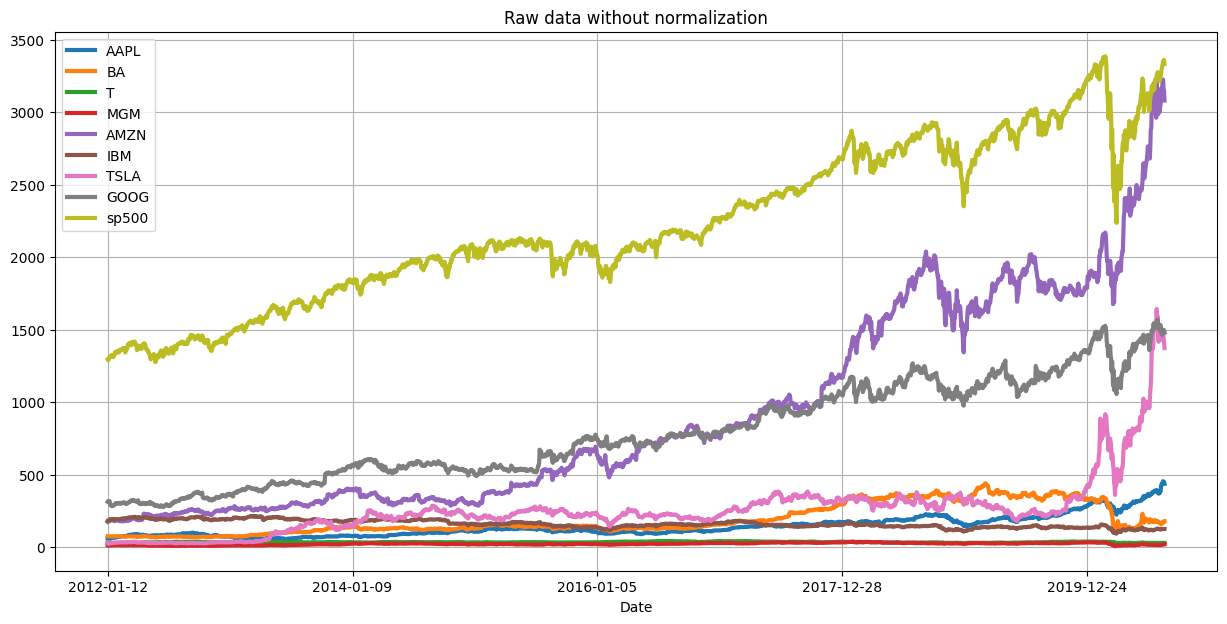

In [72]:
show_plot(stocks_df, "Raw data without normalization")